In [1]:
import model
import torch
import torch.nn as nn
import data_loader
import matplotlib.pyplot as plt

In [2]:
ds = data_loader.ObjectSegmentationDataset(r"C:\Users\user\Documents\dane\100Objects_train", r"C:\Users\user\Documents\dane\100Objects_train\annotations.json", load_memory=False)

net = model.Segmentator()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

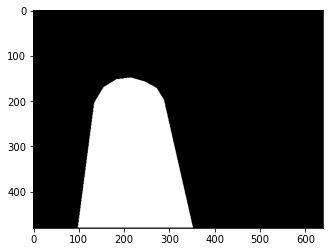

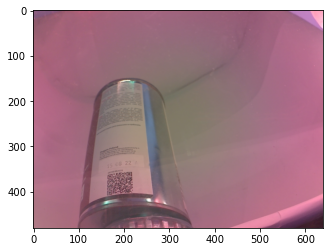

In [3]:
im, mask = ds[0]
plt.imshow(mask, cmap="gray")
plt.show()
plt.imshow(im.permute((1,2,0)))
plt.show()

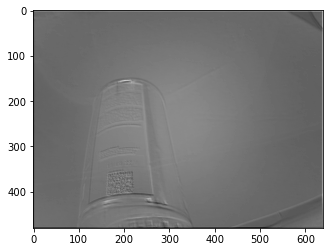

In [4]:
estimated = net(im.unsqueeze(0))
estimated = estimated.squeeze(0)
plt.imshow(estimated.detach().numpy(), cmap="gray")
plt.show()

# OVERFITTING

In [17]:
import losses
loss_fn = losses.bce_dice
for _ in range(16):
    optimizer.zero_grad()
    out = net(im.unsqueeze(0))
    loss = loss_fn(out, mask)
    print(loss)
    loss.backward()
    optimizer.step()

tensor(0.7322, grad_fn=<SubBackward0>)
tensor(0.6879, grad_fn=<SubBackward0>)
tensor(0.6507, grad_fn=<SubBackward0>)
tensor(0.6222, grad_fn=<SubBackward0>)
tensor(0.5997, grad_fn=<SubBackward0>)
tensor(0.5903, grad_fn=<SubBackward0>)
tensor(0.5901, grad_fn=<SubBackward0>)
tensor(0.5904, grad_fn=<SubBackward0>)
tensor(0.5956, grad_fn=<SubBackward0>)
tensor(0.6047, grad_fn=<SubBackward0>)
tensor(0.6090, grad_fn=<SubBackward0>)
tensor(0.6129, grad_fn=<SubBackward0>)
tensor(0.6167, grad_fn=<SubBackward0>)
tensor(0.6151, grad_fn=<SubBackward0>)
tensor(0.6135, grad_fn=<SubBackward0>)
tensor(0.6102, grad_fn=<SubBackward0>)


In [18]:
out = net(im.unsqueeze(0))

In [19]:
loss_fn(out, mask.unsqueeze(0))

tensor(0.6042, grad_fn=<SubBackward0>)

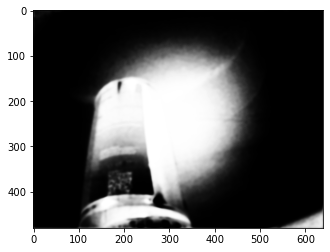

In [20]:
plt.imshow(out[0].detach().numpy(), cmap="gray")

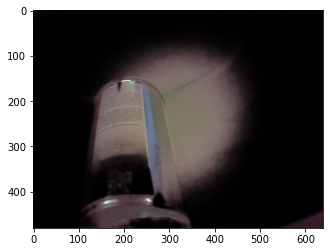

In [24]:
masked = im * out[0]
plt.imshow(masked.detach().permute((1,2,0)))
plt.show()

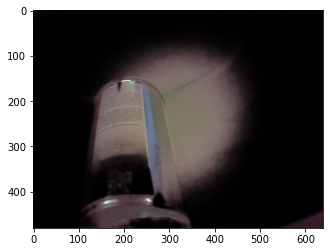

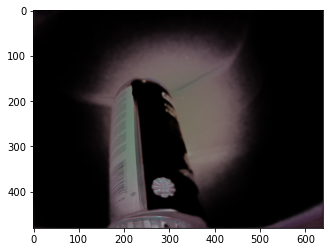

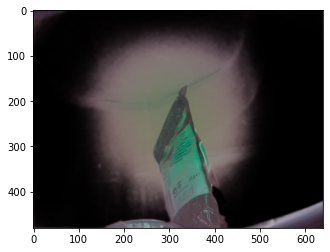

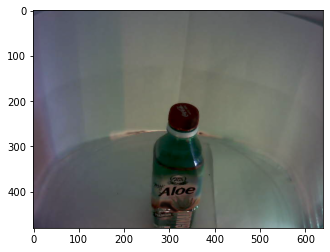

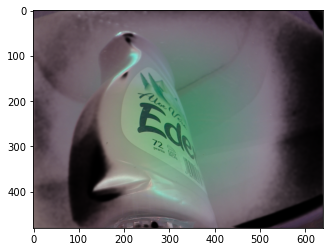

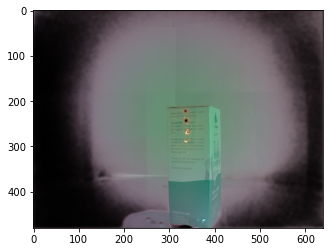

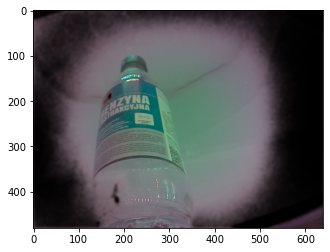

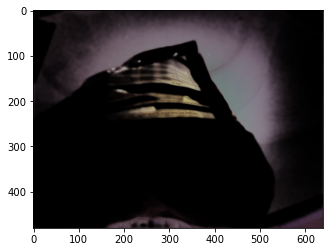

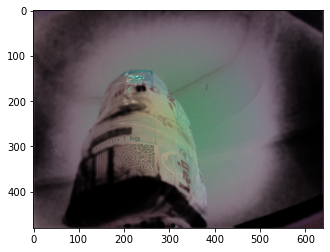

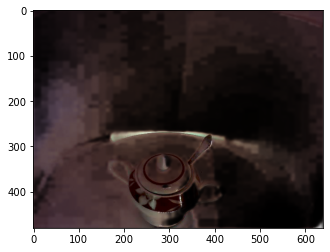

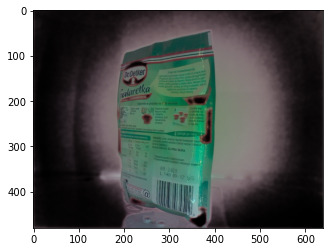

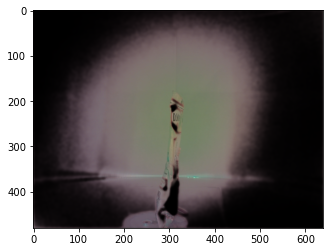

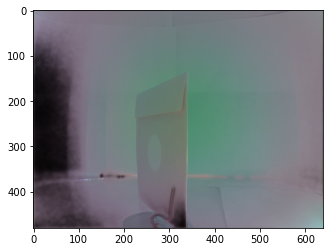

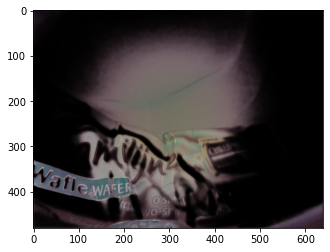

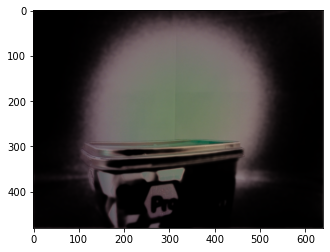

In [36]:
for i in range(15):
    im1, mask1 = ds[i]
    out = net(im1.unsqueeze(0))
    masked = im1 * out[0]
    plt.imshow(masked.detach().permute((1,2,0)))
    plt.show()